Ostu threshold= 120
OpenCV Ostu threshold= 119.0


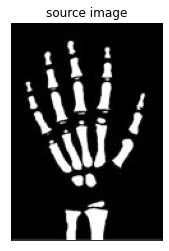

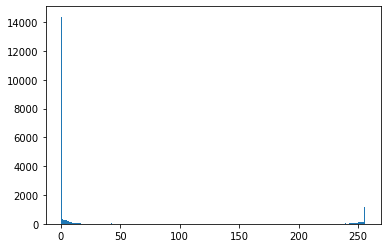

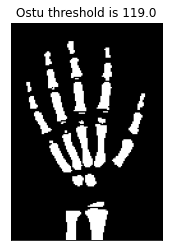

In [3]:
import math
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Modified Otsu  function
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: 
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print("Ostu threshold=",  final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

img1 = cv2.imread('5329-GT.jpg')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
otsu_img= otsu(img)
ret, otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("OpenCV Ostu threshold=", ret)


plt.imshow(img, "gray")
plt.title("source image"), plt.xticks([]), plt.yticks([])
plt.show()

hist = plt.hist(img.ravel(),256,[0,256])
plt.show()
plt.title("Histogram"), plt.xticks([]), plt.yticks([])

plt.imshow(otsu_img, "gray")
plt.title("Ostu threshold is " + str(ret)), plt.xticks([]), plt.yticks([])
plt.show()